In [511]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [512]:
df=pd.read_csv('C:/Users/revathi/Downloads/garments_worker_productivity.csv')

In [513]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [515]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [516]:
df.describe(include=object).T

,count,unique,top,freq
date,1197,59,3/11/2015,24
quarter,1197,5,Quarter1,360
department,1197,3,sweing,691
day,1197,6,Wednesday,208


In [517]:
df.duplicated().sum()

0

In [518]:
df.isnull().sum()/len(df.wip)

date                     0.000000
quarter                  0.000000
department               0.000000
day                      0.000000
team                     0.000000
targeted_productivity    0.000000
smv                      0.000000
wip                      0.422723
over_time                0.000000
incentive                0.000000
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.000000
actual_productivity      0.000000
dtype: float64

In [519]:
df.wip.fillna(df.wip.mean(),inplace=True)

In [520]:
df.department.unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [521]:
df['department']=df['department'].replace('finishing ','finishing')

In [522]:
df.idle_men.dtype

dtype('int64')

In [523]:
df['date']=pd.to_datetime(df['date'])

In [509]:
df['month']=df['date'].dt.month
df.drop('date',axis=1,inplace=True)
df.drop(['day'],axis=1)


,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sweing,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,1
1,Quarter1,finishing,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,1
2,Quarter1,sweing,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1
3,Quarter1,sweing,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1
4,Quarter1,sweing,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333,3
1193,Quarter2,finishing,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625,3
1194,Quarter2,finishing,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625,3
1195,Quarter2,finishing,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889,3


In [510]:
df['month']=df['month'].replace({1:'january',2:'february',3:'march'})

In [482]:
columns=[ 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity']

<Axes: xlabel='date', ylabel='actual_productivity'>

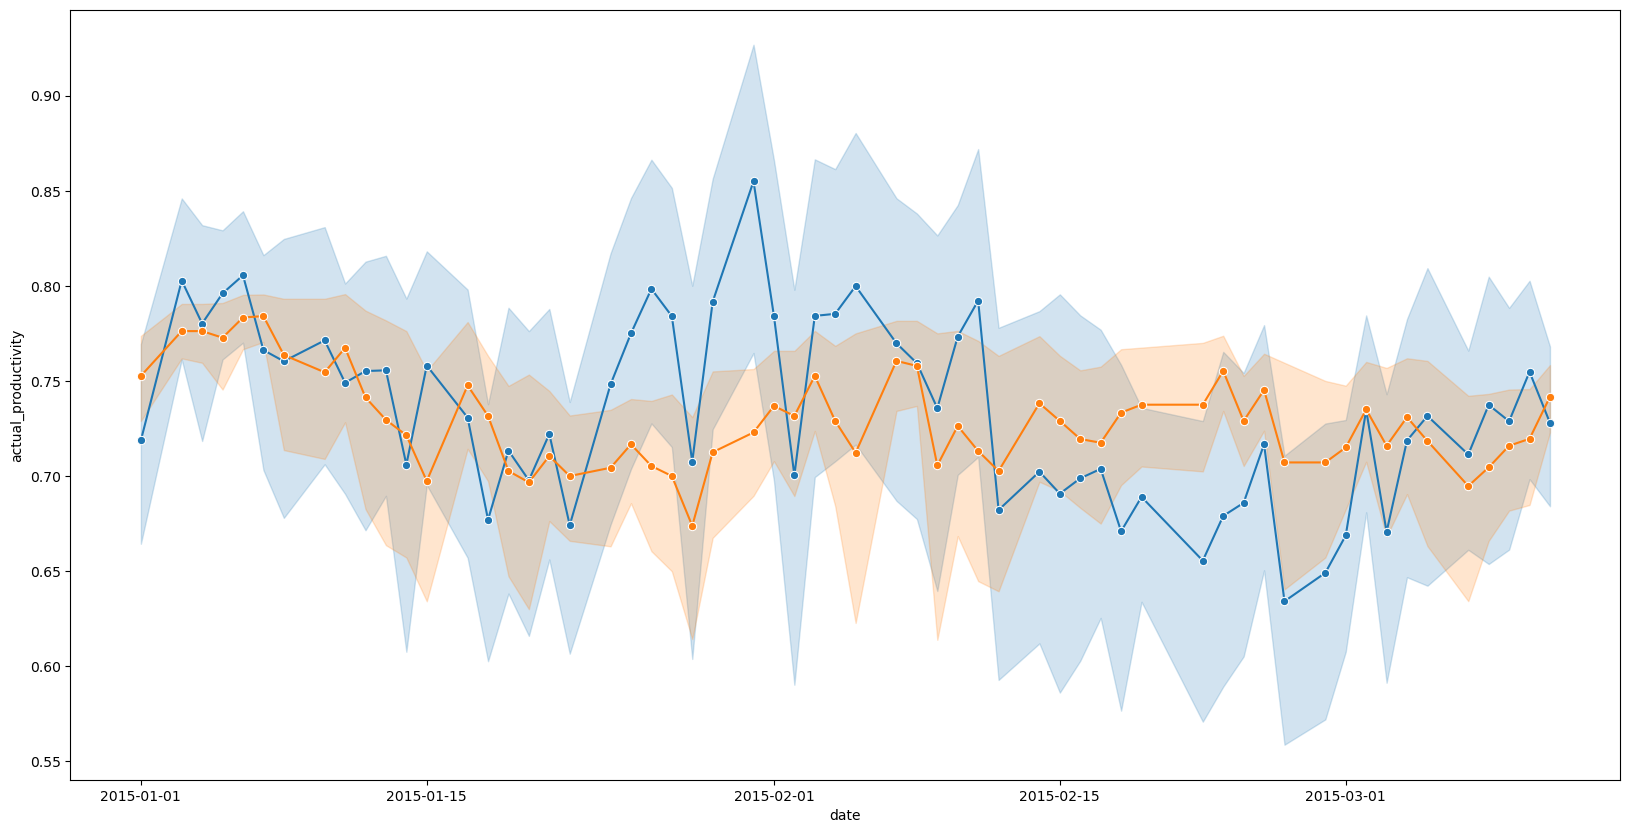

In [539]:
plt.figure(figsize=(20,10))
sns.lineplot(y=df['actual_productivity'],x=df['date'],marker='o')
sns.lineplot(y=df['targeted_productivity'],x=df['date'],marker='o')

<Axes: xlabel='quarter', ylabel='actual_productivity'>

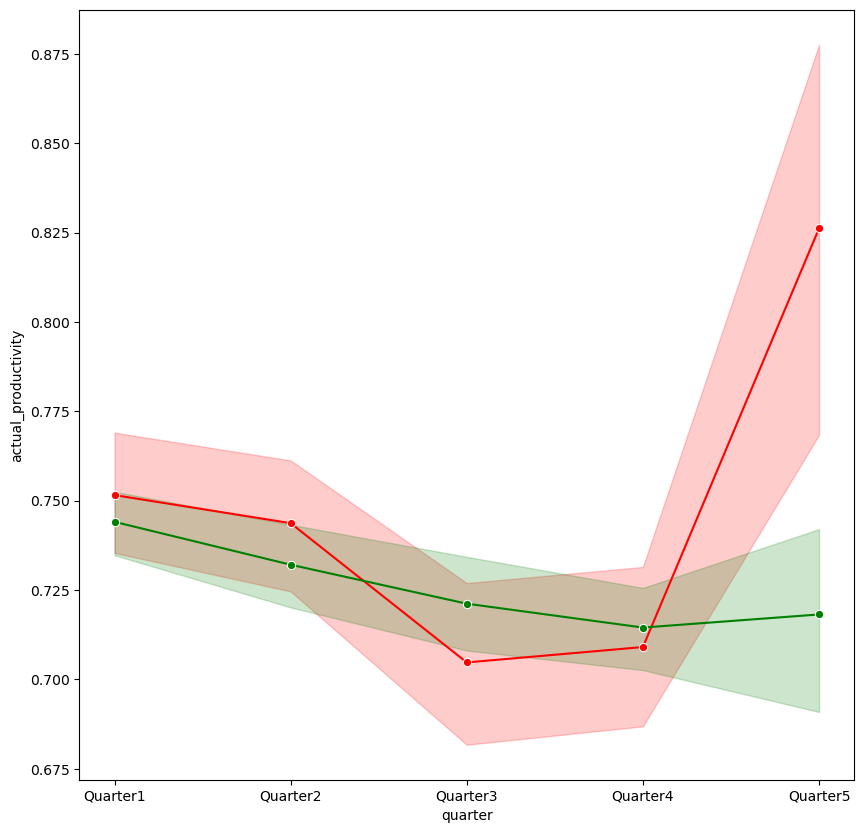

In [547]:
plt.figure(figsize=(10,10))
sns.lineplot(y=df['actual_productivity'],x=df['quarter'],color='red',marker='o')
sns.lineplot(y=df['targeted_productivity'],x=df['quarter'],color='green',marker='o')



<Axes: xlabel='smv', ylabel='targeted_productivity'>

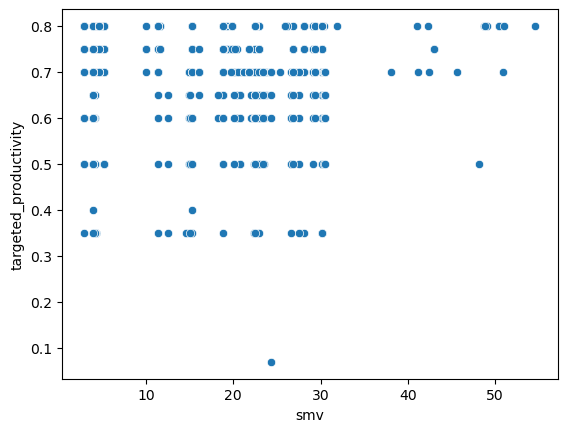

In [531]:
sns.scatterplot(x=df['smv'],y=df['targeted_productivity'])

Text(0.5, 1.0, 'Over Time by Department')

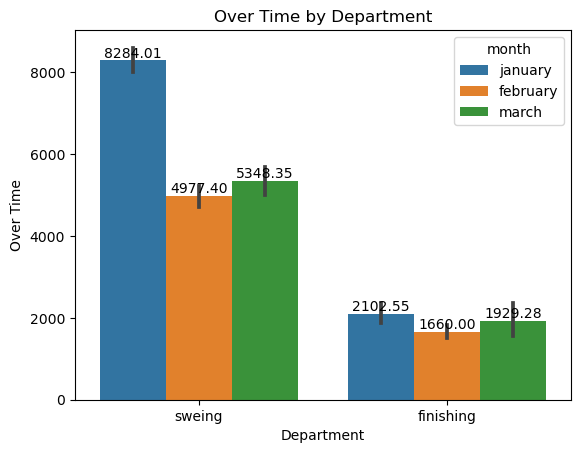

In [481]:
ax=sns.barplot(x=df['department'],y=df['over_time'],hue=df['month'])
ax.bar_label(ax.containers[0],fmt='%.2f',)
ax.bar_label(ax.containers[1],fmt='%.2f')
ax.bar_label(ax.containers[2],fmt='%.2f')

ax.set_xlabel('Department')
ax.set_ylabel('Over Time')
ax.set_title('Over Time by Department')



Text(0.5, 1.0, 'Actual productivity department wise')

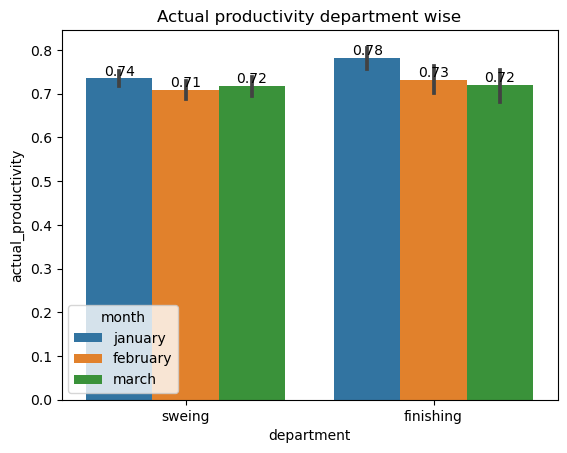

In [475]:
ax1=sns.barplot(x=df['department'],y=df['actual_productivity'],hue=df['month'])
ax1.bar_label(ax1.containers[0],fmt='%.2f')
ax1.bar_label(ax1.containers[1],fmt='%.2f')
ax1.bar_label(ax1.containers[2],fmt='%.2f')
ax1.set_title('Actual productivity department wise')

[Text(0, 0, '0.82'),
 Text(0, 0, '0.77'),
 Text(0, 0, '0.80'),
 Text(0, 0, '0.77'),
 Text(0, 0, '0.70'),
 Text(0, 0, '0.69'),
 Text(0, 0, '0.67'),
 Text(0, 0, '0.67'),
 Text(0, 0, '0.73'),
 Text(0, 0, '0.72'),
 Text(0, 0, '0.68'),
 Text(0, 0, '0.78')]

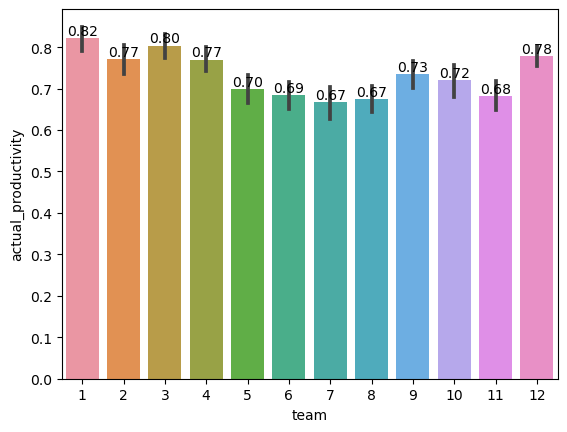

In [473]:
ax2=sns.barplot(x=df['team'],y=df['actual_productivity'])
ax2.bar_label(ax2.containers[0],fmt='%.2f')


In [1]:
plt.figure(figsize=(20,100))

for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [398]:
df_num=df.select_dtypes(include='number').columns

In [399]:
for col in df_num:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df[col]=np.where(df[col]>upper,upper,df[col])
    df[col]=np.where(df[col]<lower,lower,df[col])
    

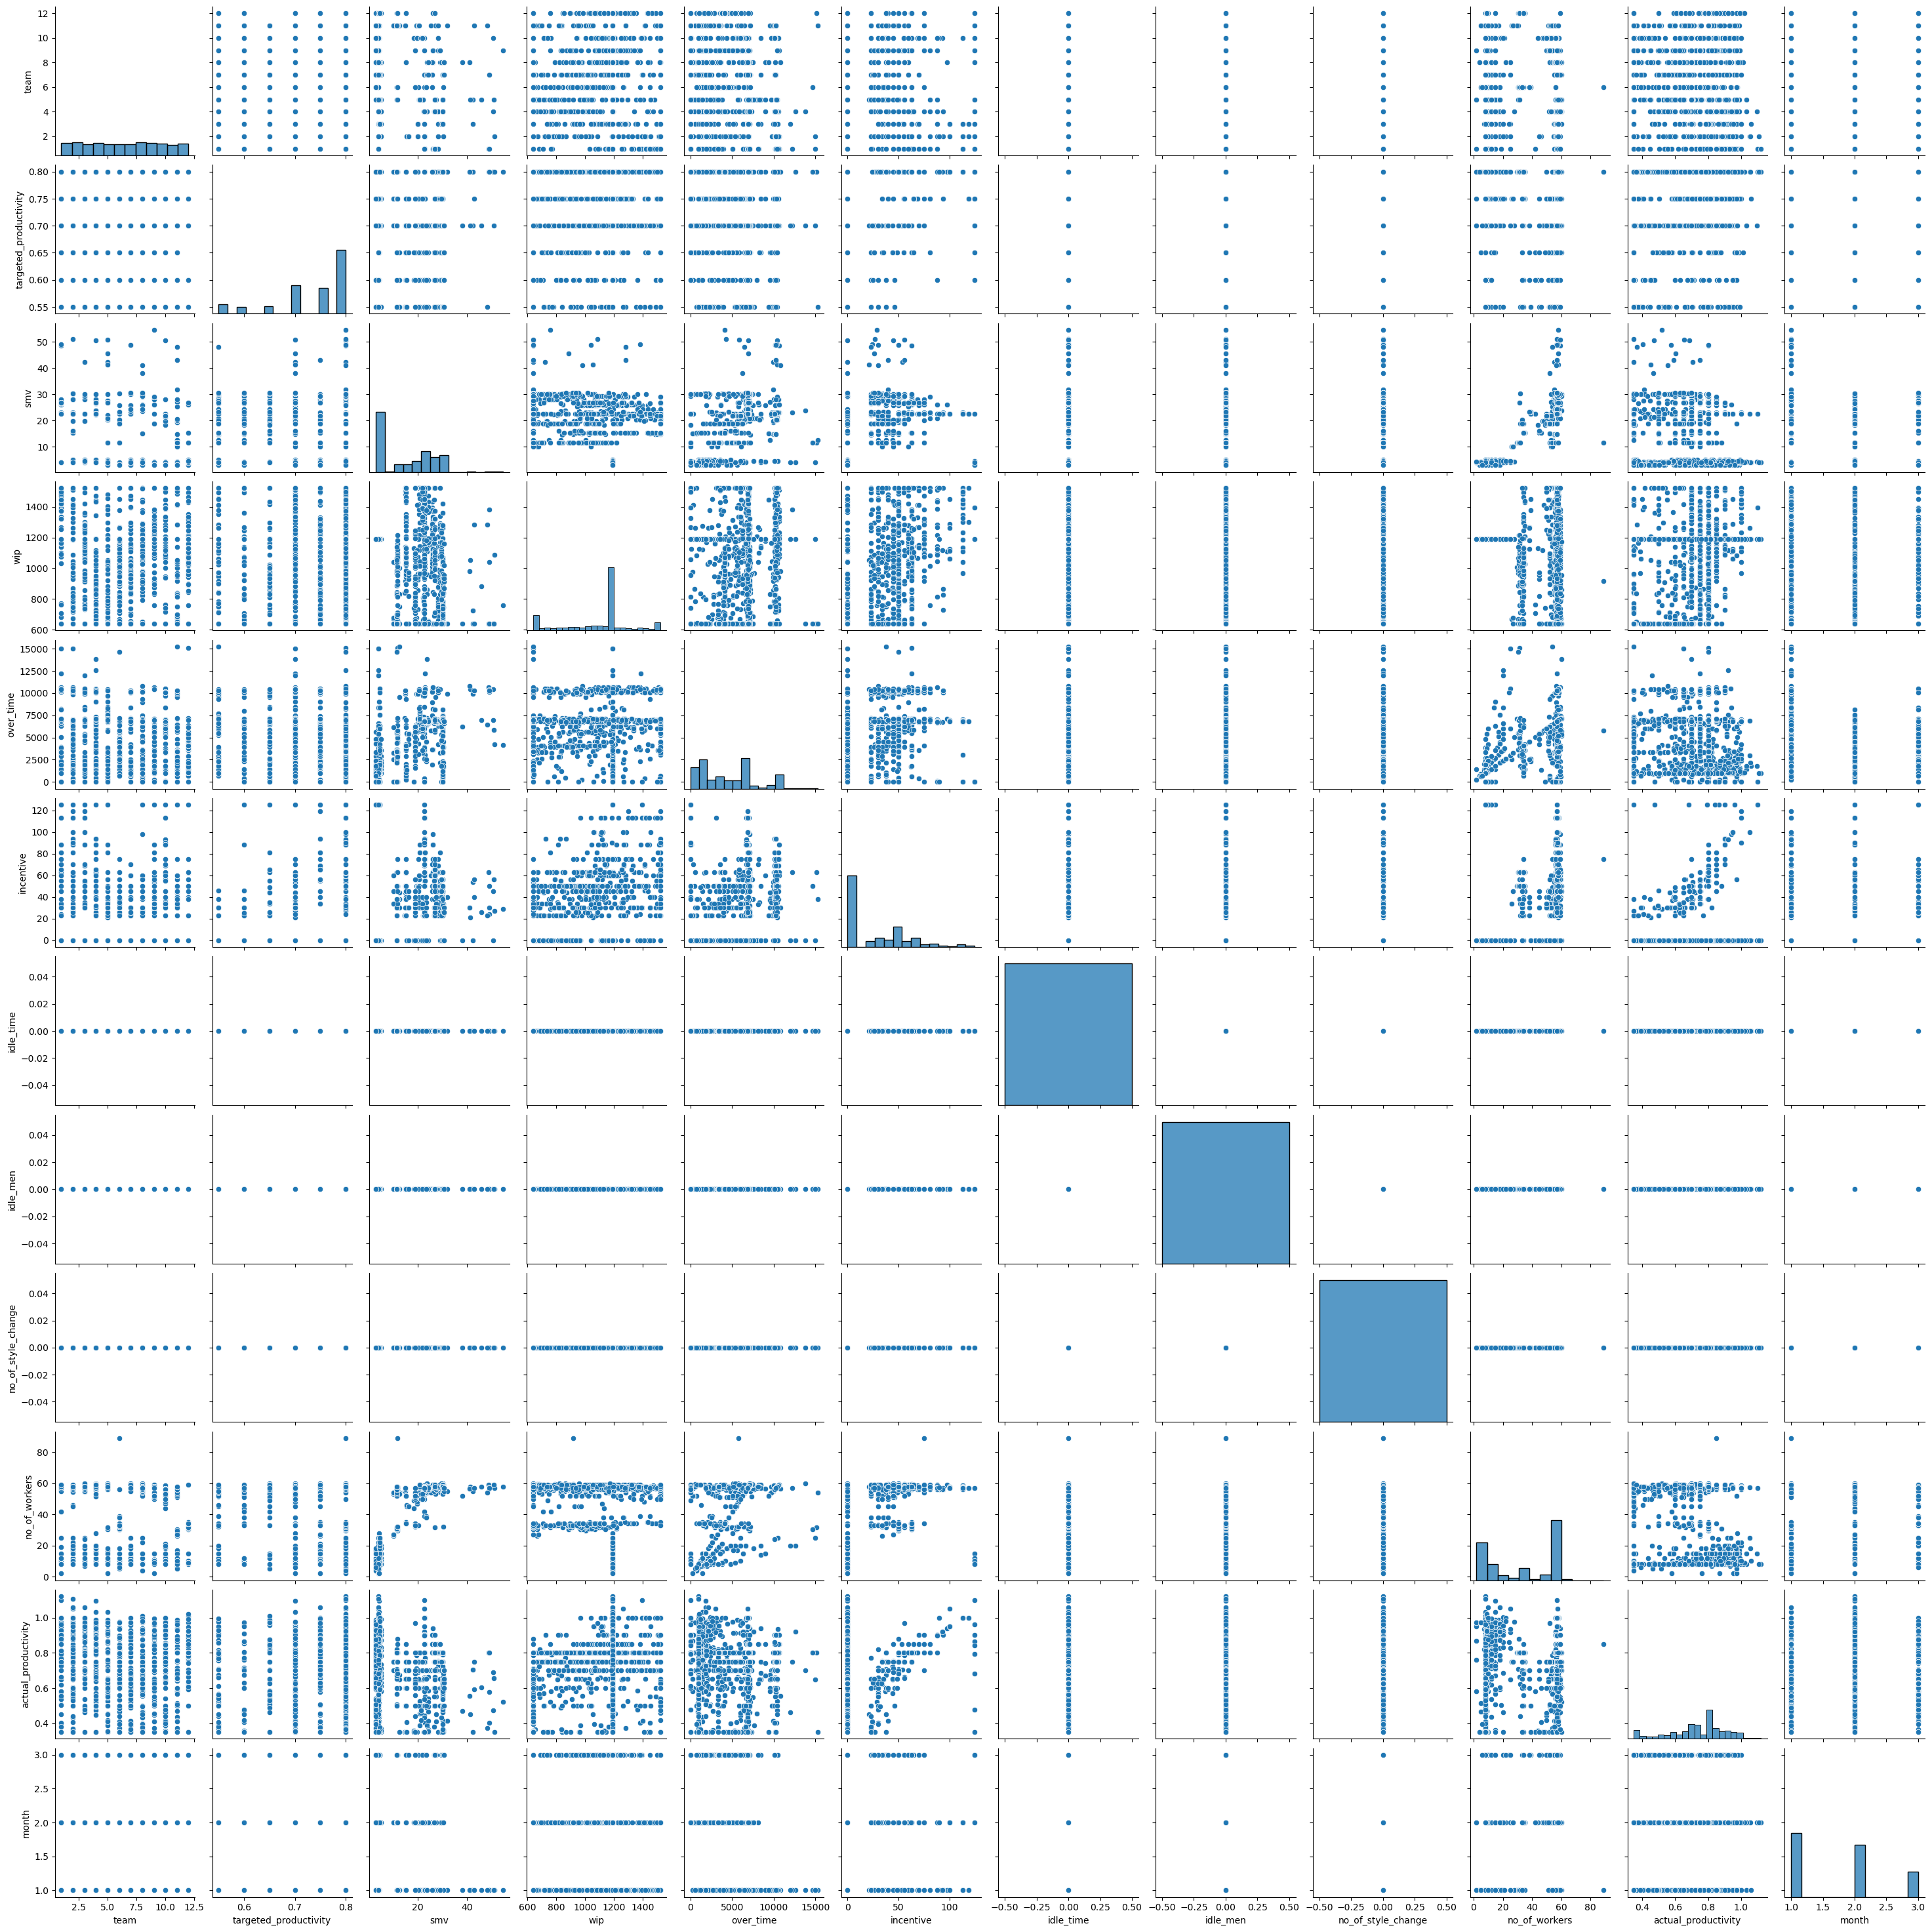

In [400]:
sns.pairplot(data=df)

In [401]:
df.department.nunique()

2

In [402]:
corre=df.corr

C:\Users\revathi\AppData\Local\Temp\ipykernel_12712\3082663832.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='0.2f')


<Axes: >

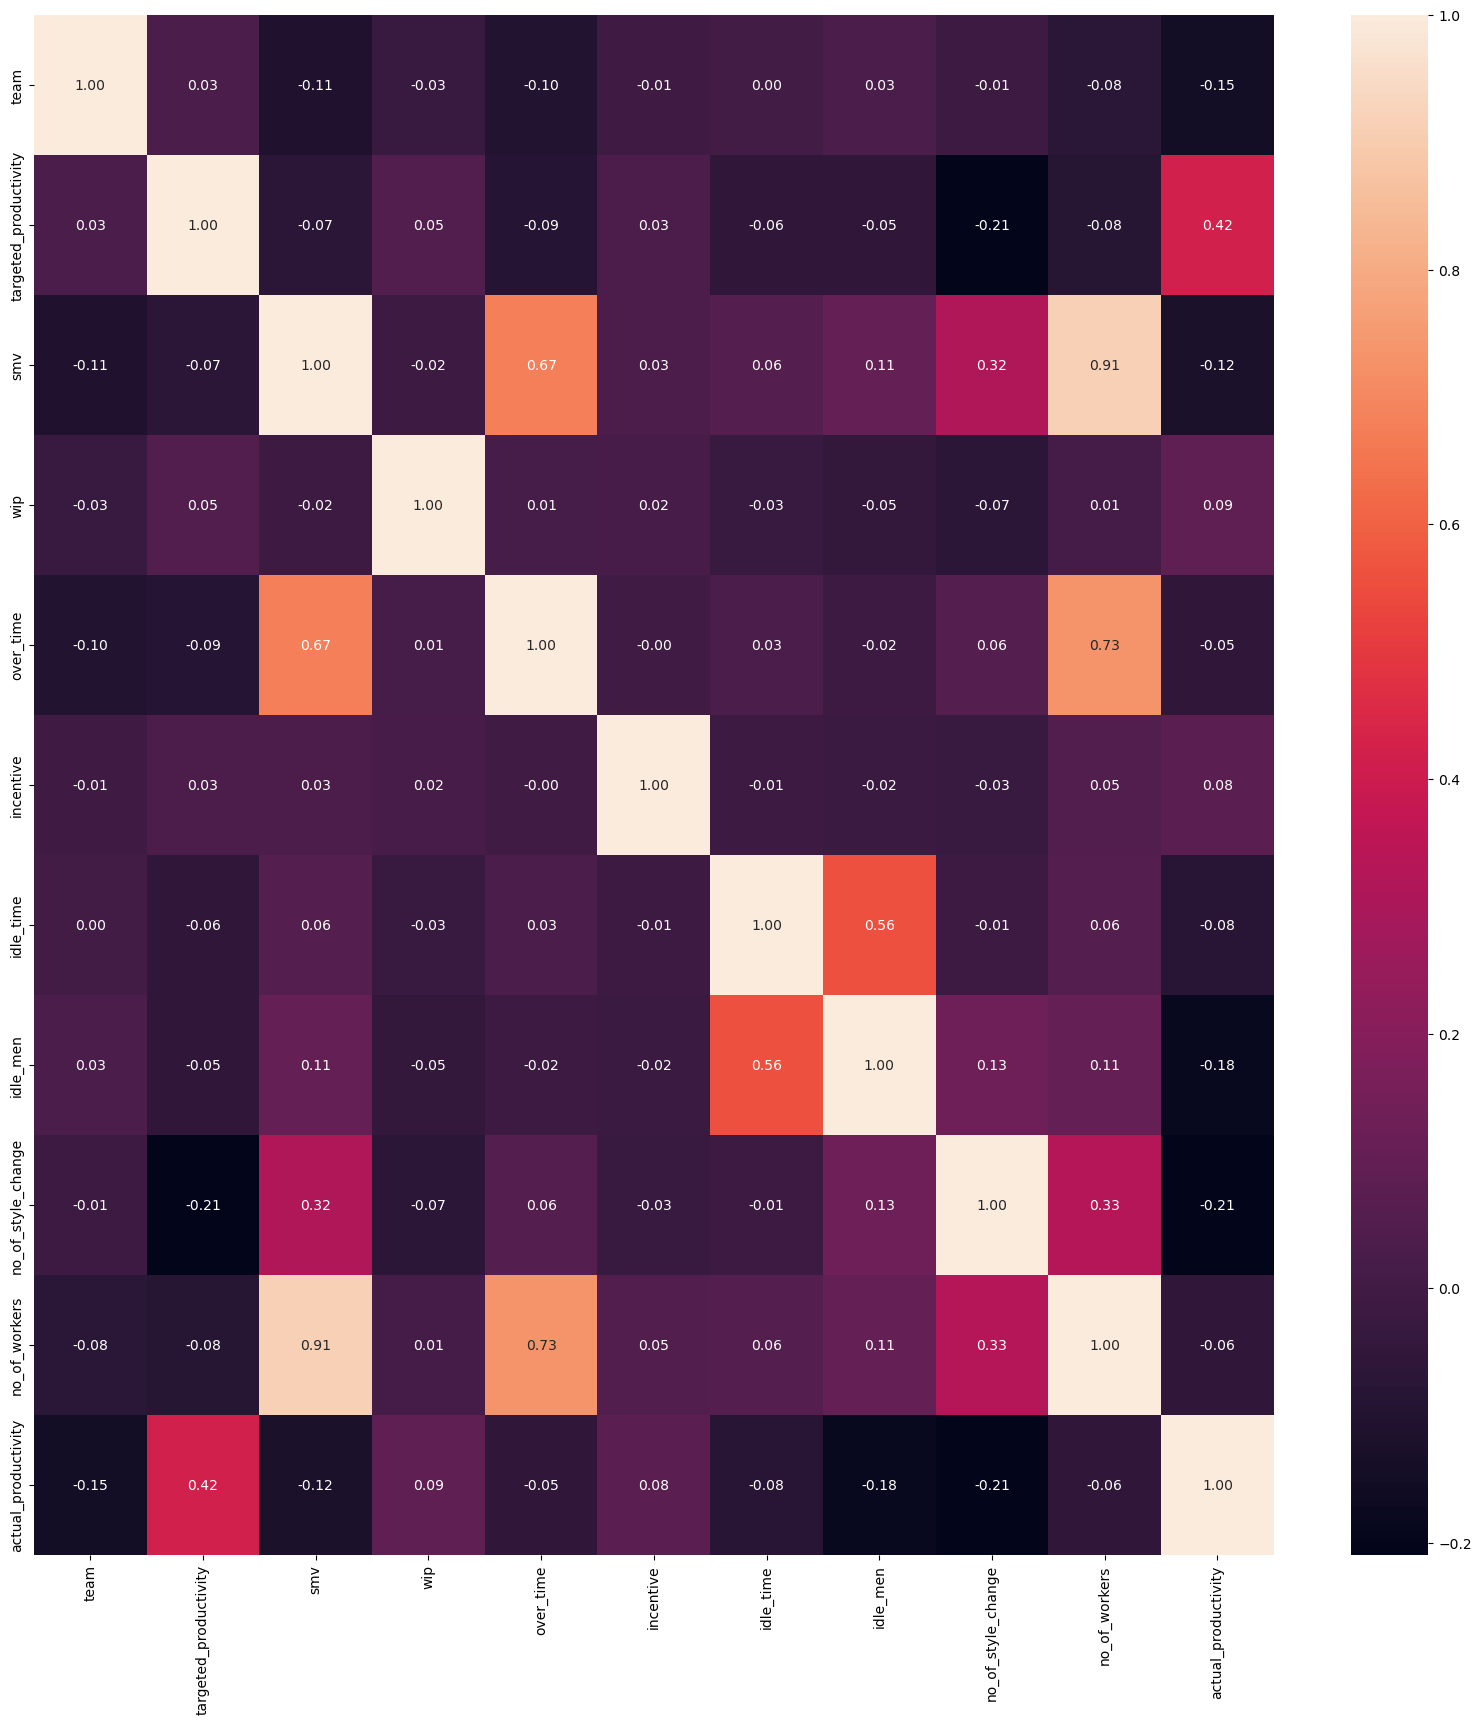

In [551]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [404]:
df_obj=df.select_dtypes(include='object').columns
df_obj

Index(['quarter', 'department', 'day'], dtype='object')

In [405]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_obj:
    df[col]=le.fit_transform(df[col])

In [406]:
X=df.drop('actual_productivity',axis=1)
y=df.actual_productivity

In [407]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [408]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train.iloc[:,:]=ss.fit_transform(X_train)
X_test.iloc[:,:]=ss.transform(X_test)



In [409]:
from sklearn .linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

le=LinearRegression()
le.fit(X_train,y_train)
pred=le.predict(X_test)

print(f'Mean squared error is{mean_squared_error(y_test,pred)}')
print(f'Mean absolute error is{mean_absolute_error(y_test,pred)}')
print(f'r square  is{r2_score(y_test,pred)}')

      

Mean squared error is0.020625683432772657
Mean absolute error is0.1029205414573881
r square  is0.2935217675073959


In [410]:
from sklearn.ensemble import GradientBoostingRegressor




kb=GradientBoostingRegressor()
kb.fit(X_train,y_train)
y_4=kb.predict(X_test)

print("test_MSE:",mean_squared_error(y_test,y_4))
print("test_MAE:",mean_absolute_error(y_test,y_4))
print("R2_score:{}".format(r2_score(y_test,y_4)))

test_MSE: 0.016431845806067102
test_MAE: 0.08379920459706537
R2_score:0.4371705830015854


In [411]:
from sklearn.ensemble import RandomForestRegressor
model_rfe = RandomForestRegressor()
model_rfe.fit(X_train, y_train)
pred = model_rfe.predict(X_test)
print("test_MSE:",mean_squared_error(y_test, pred))
print("test_MAE:",mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.015780806757675882
test_MAE: 0.07777015759066669
R2_score:0.45947020365125935
